## **Install and Import Dependencies**

In [1]:
!pip install openbharatocr

In [2]:
import openbharatocr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## **Read in Images**

In [4]:
Image_path = '/content/Screenshot 2026-02-16 113845.png'

In [5]:
from PIL import Image

# Load the image using Pillow
img_pil = Image.open(Image_path)

# Convert to RGB if it's RGBA, as JPEG does not support alpha channel
if img_pil.mode == 'RGBA':
    img_pil = img_pil.convert('RGB')

# Save the converted image to a temporary JPEG file
temp_image_path = '/content/temp_image.jpg'
img_pil.save(temp_image_path, "JPEG")

# Call openbharatocr.passport with the path to the temporary JPEG file
result = openbharatocr.passport(temp_image_path)
# Returns: {'name': str, 'passport_number': str, 'dob': str, 'doi': str, 'doe': str}

In [6]:
result

{'Name': 'MINAKSHI',
 'Surname': 'BEHERA',
 'Passport Number': 'N9340404',
 'Gender': '',
 'Place of Birth': 'MINAKSHI',
 'Date of Birth': '11/08/2026',
 'Place of Issue': 'A ERA ODISHA',
 'Date of Issue': '',
 'Expiry Date': ''}

## **Draw Results**

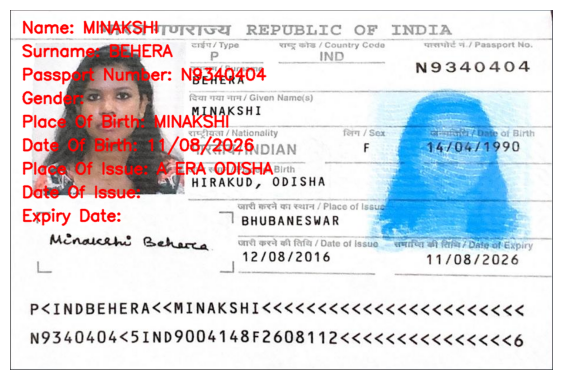

In [7]:
img = cv2.imread(temp_image_path)

# Extract Passport details
passport_result = openbharatocr.passport(temp_image_path)

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 0, 255)   # Red looks good on passport
thickness = 2

y = 40
line_gap = 40

for key, value in passport_result.items():
    text = f"{key.replace('_', ' ').title()}: {value}"
    cv2.putText(img, text, (20, y), font, 0.9, color, thickness, cv2.LINE_AA)
    y += line_gap

plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()